# Feature Engineering

* How to derive new features from existing input features
* How to extract polynomial features from numerical features
* How to extract additional information from date columns

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('datasets/insurance.csv')
data.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [2]:
print (data.shape)

(1338, 7)


Mathematical way to determine number of bins.

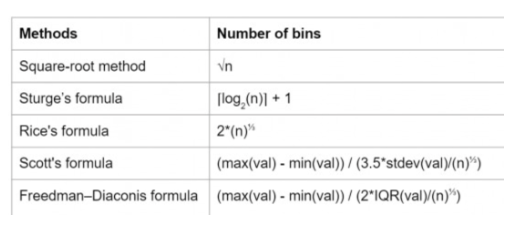

In [3]:
# Approximate number of bins is related to the number of samples or rows
import math
number_of_bins = math.sqrt(data.shape[0])
print ('Number of bins: {}'.format(math.floor(number_of_bins)))

Number of bins: 36


# 1) Binning - converting numeric column to categorical column

Initially we randomly choose bins to be 10.

In [4]:
data['age_bins_10'] = pd.cut(data['age'], bins=10)
data[['age', 'age_bins_10']].head()

age     age_bins_10
0   19  (17.954, 22.6]
1   18  (17.954, 22.6]
2   28    (27.2, 31.8]
3   33    (31.8, 36.4]
4   32    (31.8, 36.4]

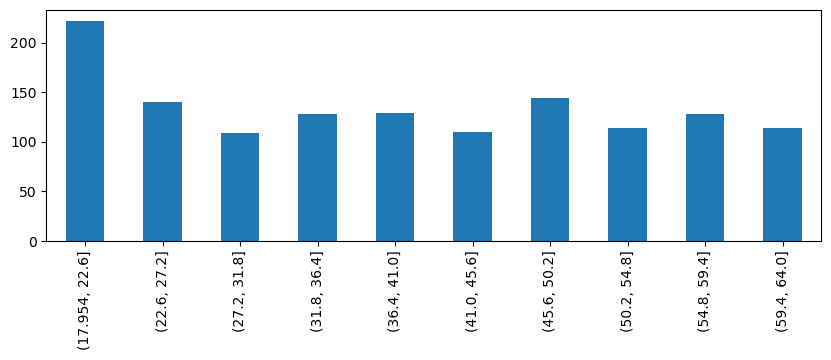

In [5]:
f, ax = plt.subplots(figsize=(10, 3))
sorted_counts = data['age_bins_10'].value_counts().sort_index()
sorted_counts.plot(kind='bar');

#data['age_bins_10'].value_counts().plot(kind='bar');

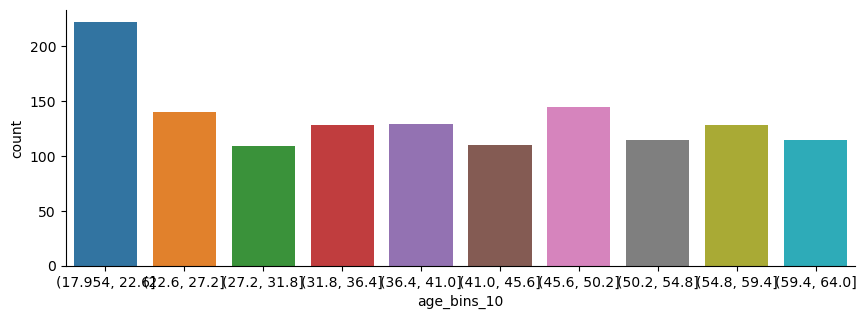

In [6]:
p = sns.catplot(x='age_bins_10', kind="count",data=data)
plt.gcf().set_size_inches(10, 3)

In [7]:
data['age_bins_36'] = pd.cut(data['age'], bins=36)
data[['age', 'age_bins_36']].head()

age       age_bins_36
0   19  (17.954, 19.278]
1   18  (17.954, 19.278]
2   28  (26.944, 28.222]
3   33  (32.056, 33.333]
4   32  (30.778, 32.056]

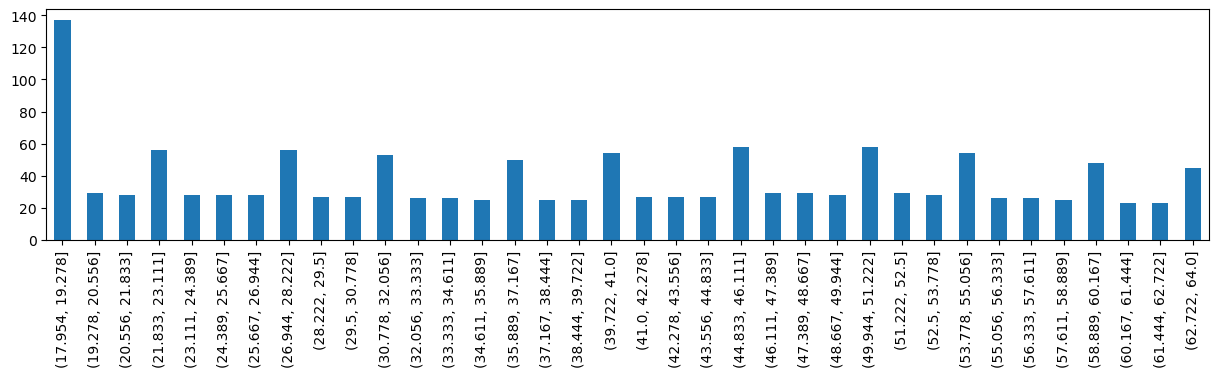

In [8]:
f, ax = plt.subplots(figsize=(15, 3))
sorted_counts = data['age_bins_36'].value_counts().sort_index()
sorted_counts.plot(kind='bar');

#data['age_bins_36'].value_counts().plot(kind='bar');

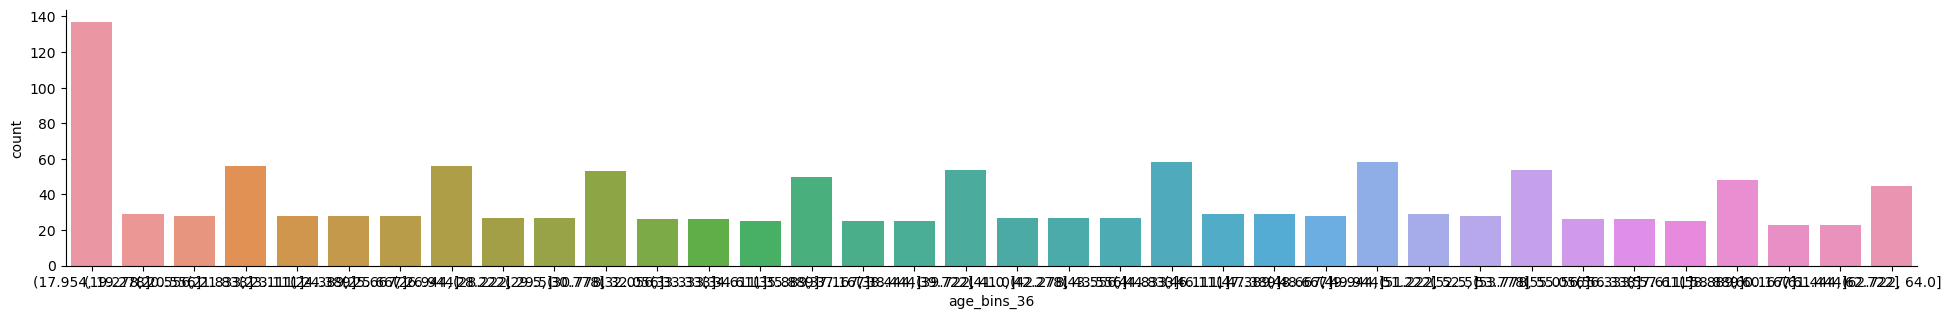

In [9]:
p = sns.catplot(x='age_bins_36', kind="count", data=data)
plt.gcf().set_size_inches(25, 3)

# Replace ',' with '-' from age_bins col  

This is just formatting for better understanding of data.

In [10]:
# syntax of lambda functions: lambda bound_variable:body
data['age_bins_10'] = data['age_bins_10'].apply(lambda x : str(x.left) + '-' + str(x.right)).astype(str)
data['age_bins_10'].head()


0    17.954-22.6
1    17.954-22.6
2      27.2-31.8
3      31.8-36.4
4      31.8-36.4
Name: age_bins_10, dtype: object

In [11]:
# syntax of lambda functions: lambda bound_variable:body
data['age_bins_36'] = data['age_bins_36'].apply(lambda x : str(x.left) + '-' + str(x.right)).astype(str)
data['age_bins_36'].head()


0    17.954-19.278
1    17.954-19.278
2    26.944-28.222
3    32.056-33.333
4    30.778-32.056
Name: age_bins_36, dtype: object

In [12]:
data.head()

age     sex   bmi  children smoker     region  expenses  age_bins_10  \
0   19  female  27.9         0    yes  southwest  16884.92  17.954-22.6   
1   18    male  33.8         1     no  southeast   1725.55  17.954-22.6   
2   28    male  33.0         3     no  southeast   4449.46    27.2-31.8   
3   33    male  22.7         0     no  northwest  21984.47    31.8-36.4   
4   32    male  28.9         0     no  northwest   3866.86    31.8-36.4   

     age_bins_36  
0  17.954-19.278  
1  17.954-19.278  
2  26.944-28.222  
3  32.056-33.333  
4  30.778-32.056

# 2) Use 'bmi' col with a base value 28 & create a new threshold based binary column

In [13]:
data['high_bmi'] = data['bmi'].apply(lambda x : 1 if x>28 else 0)
data.head()

age     sex   bmi  children smoker     region  expenses  age_bins_10  \
0   19  female  27.9         0    yes  southwest  16884.92  17.954-22.6   
1   18    male  33.8         1     no  southeast   1725.55  17.954-22.6   
2   28    male  33.0         3     no  southeast   4449.46    27.2-31.8   
3   33    male  22.7         0     no  northwest  21984.47    31.8-36.4   
4   32    male  28.9         0     no  northwest   3866.86    31.8-36.4   

     age_bins_36  high_bmi  
0  17.954-19.278         0  
1  17.954-19.278         1  
2  26.944-28.222         1  
3  32.056-33.333         0  
4  30.778-32.056         1

## Use 'smoker' col create a new threshold based binary column

This is like a label encoding cz in one hot encoding we would get 2 col's like smoker_yes and smoker_no but below we just have 1 column is_smoker.

In [14]:
data['is_smoker'] = data['smoker'].apply(lambda x : 1 if x=='yes' else 0)
data.head()

age     sex   bmi  children smoker     region  expenses  age_bins_10  \
0   19  female  27.9         0    yes  southwest  16884.92  17.954-22.6   
1   18    male  33.8         1     no  southeast   1725.55  17.954-22.6   
2   28    male  33.0         3     no  southeast   4449.46    27.2-31.8   
3   33    male  22.7         0     no  northwest  21984.47    31.8-36.4   
4   32    male  28.9         0     no  northwest   3866.86    31.8-36.4   

     age_bins_36  high_bmi  is_smoker  
0  17.954-19.278         0          1  
1  17.954-19.278         1          0  
2  26.944-28.222         1          0  
3  32.056-33.333         0          0  
4  30.778-32.056         1          0

# Create new col where a person is 'smoker' with high 'bmi' 

Probably high chance of unhealthy.

In [15]:
data['smoker_high_bmi'] = data['high_bmi'] * data['is_smoker']

In [16]:
data.head()

age     sex   bmi  children smoker     region  expenses  age_bins_10  \
0   19  female  27.9         0    yes  southwest  16884.92  17.954-22.6   
1   18    male  33.8         1     no  southeast   1725.55  17.954-22.6   
2   28    male  33.0         3     no  southeast   4449.46    27.2-31.8   
3   33    male  22.7         0     no  northwest  21984.47    31.8-36.4   
4   32    male  28.9         0     no  northwest   3866.86    31.8-36.4   

     age_bins_36  high_bmi  is_smoker  smoker_high_bmi  
0  17.954-19.278         0          1                0  
1  17.954-19.278         1          0                0  
2  26.944-28.222         1          0                0  
3  32.056-33.333         0          0                0  
4  30.778-32.056         1          0                0

In [17]:
len(data)

1338

- Now that we have high_bmi and is_smoker & using these 2 new col's we have made another new col which is smoker_high_bmi. 
- To just use `smoker_high_bmi` and remove  `high_bmi` and `is_smoker` OR keep all 3? **It never hurts to retain the original data that is there.**
- We also need to look into the context/ problem to take a call on this because 1st step in Data Science is Problem Formulation and then data discovery.

# 3) Add Polynomial Features with 'deg =3' and 'include_bias = False' on 'age' col

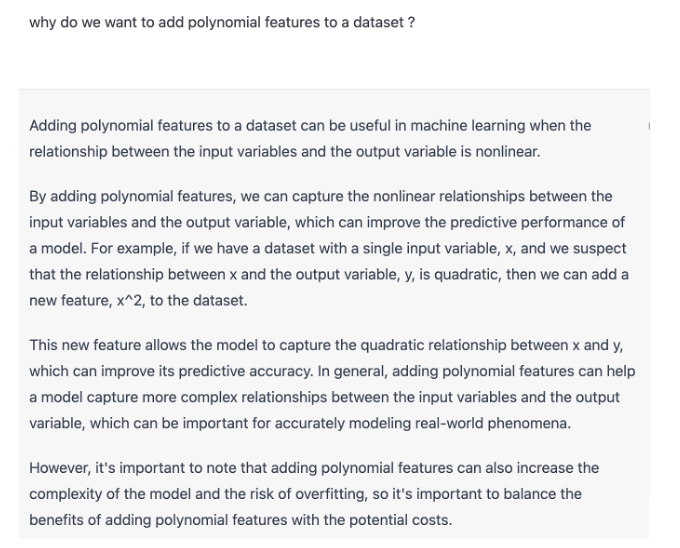

In [18]:
from sklearn.preprocessing import PolynomialFeatures
# 1 + x + xˆ2 + xˆ3. include_bias removes constant and results in x + xˆ2 + xˆ3
poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(data['age'].to_frame())
poly

array([[1.90000e+01, 3.61000e+02, 6.85900e+03],
       [1.80000e+01, 3.24000e+02, 5.83200e+03],
       [2.80000e+01, 7.84000e+02, 2.19520e+04],
       ...,
       [1.80000e+01, 3.24000e+02, 5.83200e+03],
       [2.10000e+01, 4.41000e+02, 9.26100e+03],
       [6.10000e+01, 3.72100e+03, 2.26981e+05]])

### Create dataframe of feature with related degrees 

In [19]:
df_poly = pd.DataFrame(poly, columns=['age_degree_ %d'%x for x in range(1,4)])

In [20]:
df_poly.head()

age_degree_ 1  age_degree_ 2  age_degree_ 3
0           19.0          361.0         6859.0
1           18.0          324.0         5832.0
2           28.0          784.0        21952.0
3           33.0         1089.0        35937.0
4           32.0         1024.0        32768.0

Usually we reduce features, why we would want to increase features? If u already have 300 features u dont do this but if u have single/few feature u do this usually to capture non-linear relationships in regression.

# Other Transformations

###  Log transformation

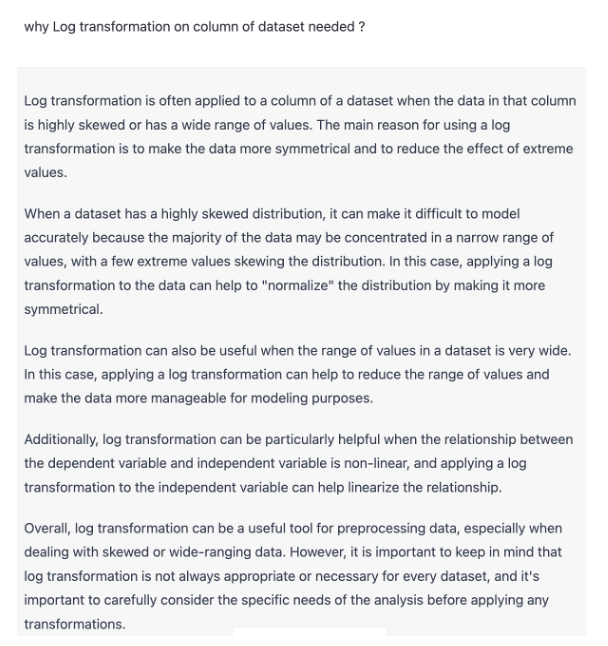

In [21]:
data['age_log'] = np.log(data['age'])

In [22]:
data[['age','age_log']].head()

age   age_log
0   19  2.944439
1   18  2.890372
2   28  3.332205
3   33  3.496508
4   32  3.465736

Can log transformations help to identify outliers ?

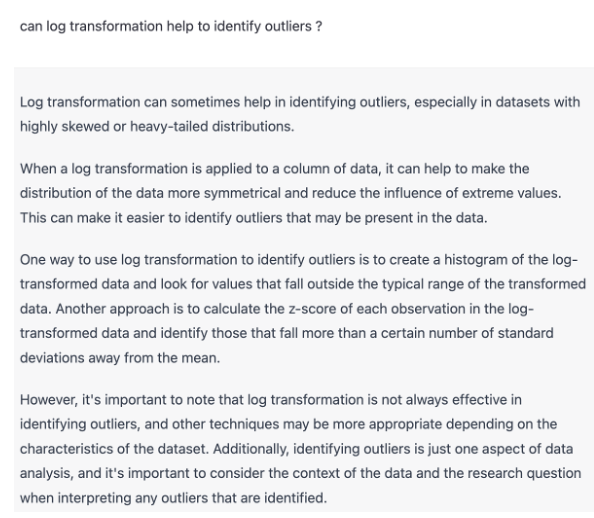

## Identifying Correlations

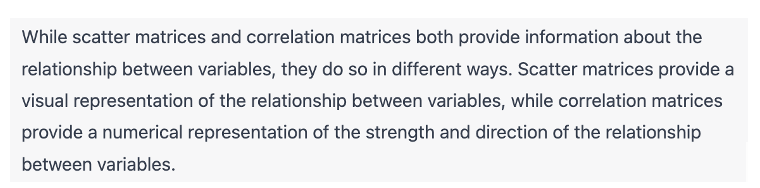

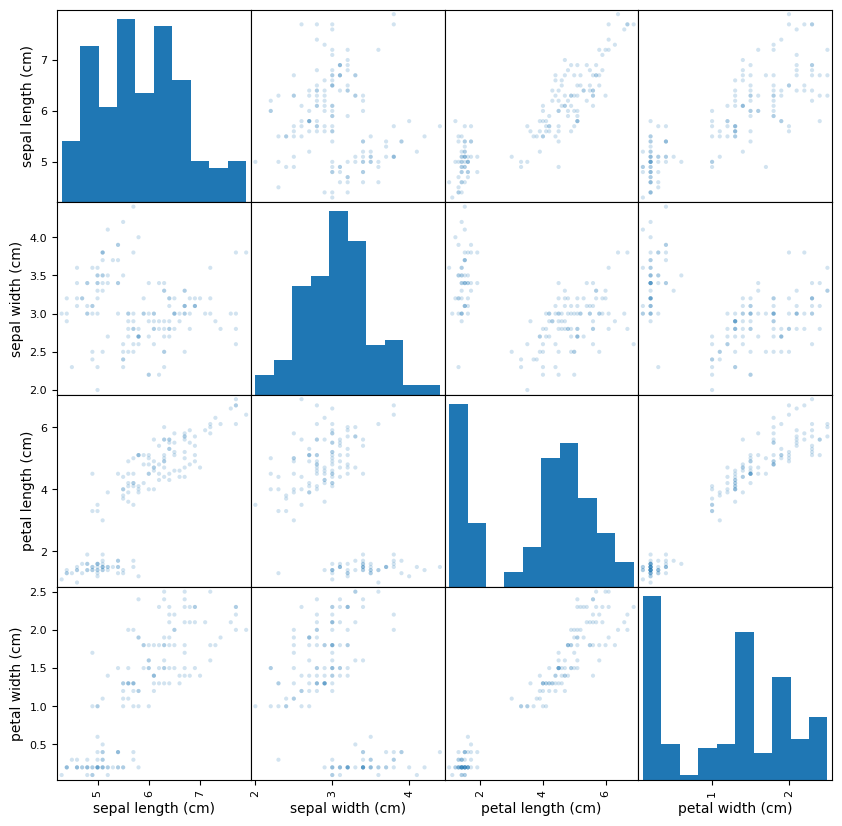

In [23]:
from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame

from pandas.plotting import scatter_matrix

iris = load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
scatter_matrix(df, alpha=0.2, figsize=(10,10));

From above graph we can see correlation is there among predictor variables. e.g. b/w sepal length & petal length, also b/w petal length & petal width etc

In [24]:
# Plotly Express

import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df,dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],color="species")
fig.show()


**Analysis**

- Above we can see that data for setosa is not correlated, can be easily seperated.
- However data for versicolor & virginica is correlated & mixed up.
- So dataset is collinear w.r.t versicolor & virginica but not w.r.t setosa.
- To quantitatively declare whether 2 variables related or not, check the correlation matrix which has numerical values & based on that take the call to reduce collinearity i.e. removal of related variables.

# Date and Time Analysis

In [25]:
tickets = pd.read_csv('datasets/tickets.csv')
tickets.head()

user_id   ticket_raised_time   ticket_closed_time
0   333730  2015-01-29 07:21:52  2015-02-09 13:49:48
1   289571  2015-04-23 03:38:00  2015-04-27 06:40:42
2   341013  2015-05-13 05:12:24  2015-07-13 01:41:47
3   339350  2015-07-09 23:09:47  2015-07-29 23:46:03
4   361874  2015-05-07 23:46:55  2015-06-30 13:47:04

In [26]:
tickets.dtypes

user_id                int64
ticket_raised_time    object
ticket_closed_time    object
dtype: object

In [27]:
tickets['ticket_raised_time'] = pd.to_datetime(tickets['ticket_raised_time'],format='%Y-%m-%d %H:%M:%S')
tickets['ticket_closed_time'] = pd.to_datetime(tickets['ticket_closed_time'],format='%Y-%m-%d %H:%M:%S')


In [28]:
tickets.dtypes

user_id                        int64
ticket_raised_time    datetime64[ns]
ticket_closed_time    datetime64[ns]
dtype: object

In [29]:
tickets.head()

user_id  ticket_raised_time  ticket_closed_time
0   333730 2015-01-29 07:21:52 2015-02-09 13:49:48
1   289571 2015-04-23 03:38:00 2015-04-27 06:40:42
2   341013 2015-05-13 05:12:24 2015-07-13 01:41:47
3   339350 2015-07-09 23:09:47 2015-07-29 23:46:03
4   361874 2015-05-07 23:46:55 2015-06-30 13:47:04

In [30]:
tickets['raised_time_year'] = tickets['ticket_raised_time'].dt.year
tickets['raised_time_month'] = tickets['ticket_raised_time'].dt.month
tickets['raised_time_day'] = tickets['ticket_raised_time'].dt.day
tickets.head()

user_id  ticket_raised_time  ticket_closed_time  raised_time_year  \
0   333730 2015-01-29 07:21:52 2015-02-09 13:49:48              2015   
1   289571 2015-04-23 03:38:00 2015-04-27 06:40:42              2015   
2   341013 2015-05-13 05:12:24 2015-07-13 01:41:47              2015   
3   339350 2015-07-09 23:09:47 2015-07-29 23:46:03              2015   
4   361874 2015-05-07 23:46:55 2015-06-30 13:47:04              2015   

   raised_time_month  raised_time_day  
0                  1               29  
1                  4               23  
2                  5               13  
3                  7                9  
4                  5                7

In [31]:
tickets['raised_time_hour'] = tickets['ticket_raised_time'].dt.hour
tickets['raised_time_minute'] = tickets['ticket_raised_time'].dt.minute
tickets['raised_time_second'] = tickets['ticket_raised_time'].dt.second
tickets.head()

user_id  ticket_raised_time  ticket_closed_time  raised_time_year  \
0   333730 2015-01-29 07:21:52 2015-02-09 13:49:48              2015   
1   289571 2015-04-23 03:38:00 2015-04-27 06:40:42              2015   
2   341013 2015-05-13 05:12:24 2015-07-13 01:41:47              2015   
3   339350 2015-07-09 23:09:47 2015-07-29 23:46:03              2015   
4   361874 2015-05-07 23:46:55 2015-06-30 13:47:04              2015   

   raised_time_month  raised_time_day  raised_time_hour  raised_time_minute  \
0                  1               29                 7                  21   
1                  4               23                 3                  38   
2                  5               13                 5                  12   
3                  7                9                23                   9   
4                  5                7                23                  46   

   raised_time_second  
0                  52  
1                   0  
2                  24  
3                  47  
4                  55

In [32]:
tickets['date_diff'] = tickets['ticket_closed_time']-tickets['ticket_raised_time']
tickets[['ticket_raised_time','ticket_closed_time','date_diff']].head()

ticket_raised_time  ticket_closed_time        date_diff
0 2015-01-29 07:21:52 2015-02-09 13:49:48 11 days 06:27:56
1 2015-04-23 03:38:00 2015-04-27 06:40:42  4 days 03:02:42
2 2015-05-13 05:12:24 2015-07-13 01:41:47 60 days 20:29:23
3 2015-07-09 23:09:47 2015-07-29 23:46:03 20 days 00:36:16
4 2015-05-07 23:46:55 2015-06-30 13:47:04 53 days 14:00:09

In [33]:
tickets['date_diff'].dt.days.head()

0    11
1     4
2    60
3    20
4    53
Name: date_diff, dtype: int64

In [34]:
tickets['date_diff'].dt.total_seconds().head()

0     973676.0
1     356562.0
2    5257763.0
3    1730176.0
4    4629609.0
Name: date_diff, dtype: float64